Running RHC Algorithm with seed 8 on N Queens...
Running RHC Algorithm with seed 16 on N Queens...
Running RHC Algorithm with seed 32 on N Queens...
Running RHC Algorithm with seed 64 on N Queens...
Running RHC Algorithm with seed 128 on N Queens...
Running SA Algorithm with seed 8 on N Queens...
Running SA Algorithm with seed 16 on N Queens...
Running SA Algorithm with seed 32 on N Queens...
Running SA Algorithm with seed 64 on N Queens...
Running SA Algorithm with seed 128 on N Queens...
Running GA Algorithm with seed 8 on N Queens...
Running GA Algorithm with seed 16 on N Queens...
Running GA Algorithm with seed 32 on N Queens...
Running GA Algorithm with seed 64 on N Queens...
Running GA Algorithm with seed 128 on N Queens...


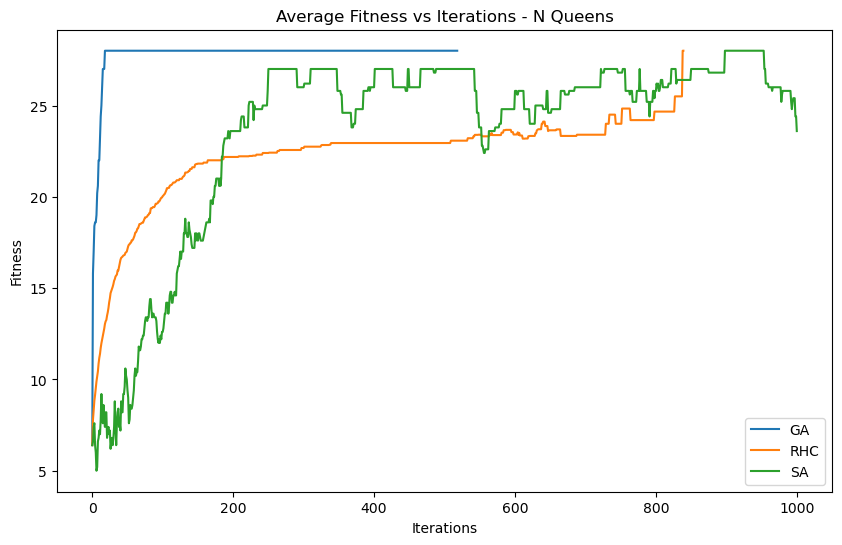

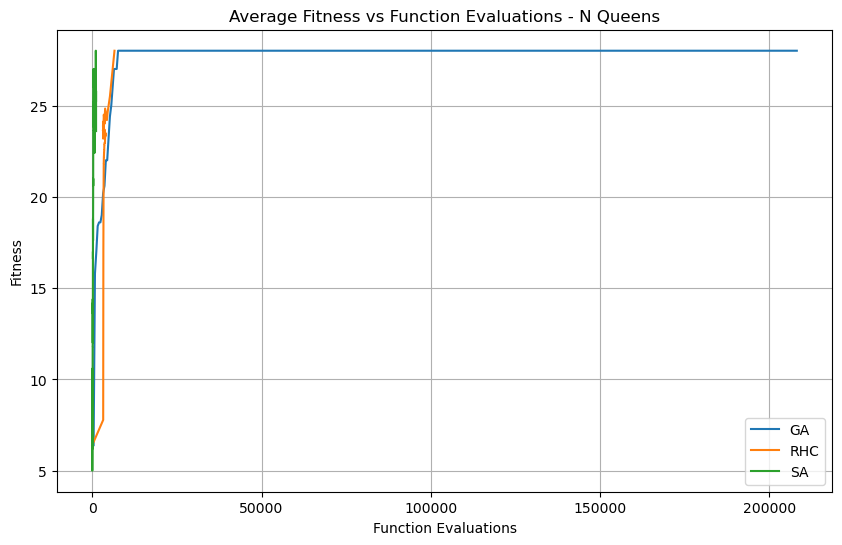

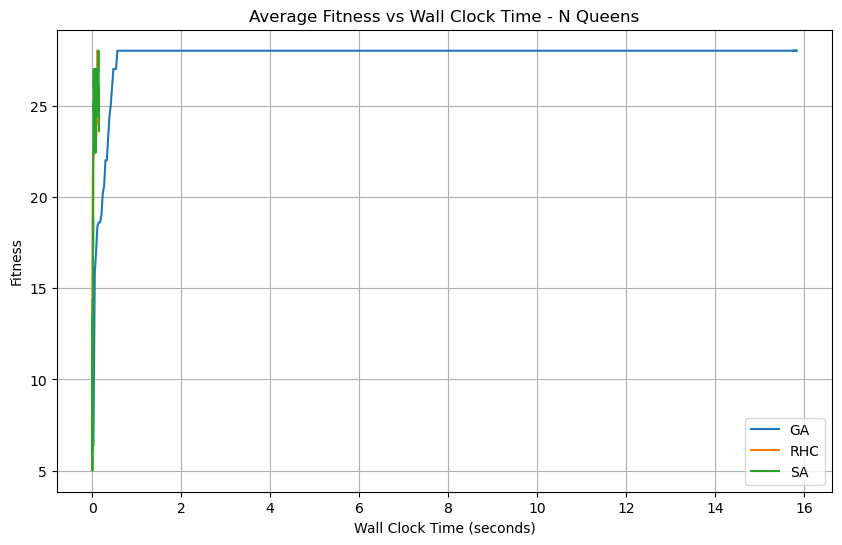

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_runner(algo_name, problem, rand_seed):
    experiment_name = f'NQueens_{algo_name}_Seed{rand_seed}'
    if algo_name == 'RHC':
        return mlrose_hiive.RHCRunner(
            problem=problem,
            experiment_name=experiment_name,
            seed=rand_seed,
            iteration_list=np.arange(0, 1001, 100),
            restart_list=[10],
            max_attempts=500
        )
    elif algo_name == 'SA':
        return mlrose_hiive.SARunner(
            problem=problem,
            experiment_name=experiment_name,
            seed=rand_seed,
            iteration_list=np.arange(0, 1001, 100),
            temperature_list=[mlrose_hiive.ExpDecay(init_temp=500, exp_const=0.1, min_temp=1.0)],
            max_attempts=500
        )
    elif algo_name == 'GA':
        return mlrose_hiive.GARunner(
            problem=problem,
            experiment_name=experiment_name,
            seed=rand_seed,
            iteration_list=np.arange(0, 1001, 100),
            population_sizes=[400],
            mutation_rates=[0.5],
            crossover_rates=[0.5],
            max_attempts=500
        )

random_seeds = [8, 16, 32, 64, 128]

# Initialize an empty DataFrame for storing the results
result_columns = ['Algorithm', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for N-Queens
fitness_fn_nqueens = mlrose_hiive.Queens()
problem_nqueens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_fn_nqueens, maximize=True, max_val=8)

# List of algorithms to run
algorithms = ['RHC', 'SA', 'GA']

# Execute optimization algorithms for each algorithm and seed
for algo_name in algorithms:
    for rand_seed in random_seeds:
 
        algo_runner = create_runner(algo_name, problem_nqueens, rand_seed)
        algo_results = algo_runner.run()

        # Extract the fitness curve data
        fitness_data = algo_results[1]

        # Create a DataFrame for the current algorithm and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add algorithm and seed information to the DataFrame
        temp_df['Algorithm'] = algo_name
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Algorithm', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each algorithm and iteration
avg_results = results_df.groupby(['Algorithm', 'Iteration']).mean().reset_index()

# Calculate the average fitness across iterations for each algorithm
avg_fitness_per_algo = avg_results.groupby(['Algorithm', 'Iteration'])['Fitness'].mean().reset_index()
# Calculate the average function evaluations and time across iterations for each algorithm
avg_fevals_per_algo = avg_results.groupby(['Algorithm', 'Iteration'])['FEvals'].mean().reset_index()
avg_time_per_algo = avg_results.groupby(['Algorithm', 'Iteration'])['Time'].mean().reset_index()

# To plot Fitness vs FEvals and Fitness vs Time, merge the average fitness with average evaluations and average time
fitness_fevals_df = pd.merge(avg_fitness_per_algo, avg_fevals_per_algo, on=['Algorithm', 'Iteration'])
fitness_time_df = pd.merge(avg_fitness_per_algo, avg_time_per_algo, on=['Algorithm', 'Iteration'])

# Plot 1: Fitness vs. Iterations (up to 1000 iterations)
plt.figure(figsize=(10, 6))
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Iterations - N Queens')
for algo in avg_fitness_per_algo['Algorithm'].unique():
    subset_df = avg_fitness_per_algo[avg_fitness_per_algo['Algorithm'] == algo]
    plt.plot(subset_df['Iteration'], subset_df['Fitness'], label=f"{algo}")
plt.legend()
plt.show()

# Plot 2: Average Fitness vs. Function Evaluations
plt.figure(figsize=(10, 6))
plt.xlabel('Function Evaluations')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Function Evaluations - N Queens')
for algo in fitness_fevals_df['Algorithm'].unique():
    subset_df = fitness_fevals_df[fitness_fevals_df['Algorithm'] == algo]
    plt.plot(subset_df['FEvals'], subset_df['Fitness'], label=f"{algo}")
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Average Fitness vs. Wall Clock Time
plt.figure(figsize=(10, 6))
plt.xlabel('Wall Clock Time (seconds)')
plt.ylabel('Fitness')
plt.title('Average Fitness vs Wall Clock Time - N Queens')
for algo in fitness_time_df['Algorithm'].unique():
    subset_df = fitness_time_df[fitness_time_df['Algorithm'] == algo]
    plt.plot(subset_df['Time'], subset_df['Fitness'], label=f"{algo}")
plt.legend()
plt.grid(True)
plt.show()


Running SA on N Queens with initial temperature 1 and seed 8...
Running SA on N Queens with initial temperature 1 and seed 16...
Running SA on N Queens with initial temperature 1 and seed 32...
Running SA on N Queens with initial temperature 1 and seed 64...
Running SA on N Queens with initial temperature 1 and seed 128...
Running SA on N Queens with initial temperature 10 and seed 8...
Running SA on N Queens with initial temperature 10 and seed 16...
Running SA on N Queens with initial temperature 10 and seed 32...
Running SA on N Queens with initial temperature 10 and seed 64...
Running SA on N Queens with initial temperature 10 and seed 128...
Running SA on N Queens with initial temperature 50 and seed 8...
Running SA on N Queens with initial temperature 50 and seed 16...
Running SA on N Queens with initial temperature 50 and seed 32...
Running SA on N Queens with initial temperature 50 and seed 64...
Running SA on N Queens with initial temperature 50 and seed 128...
Running SA on N

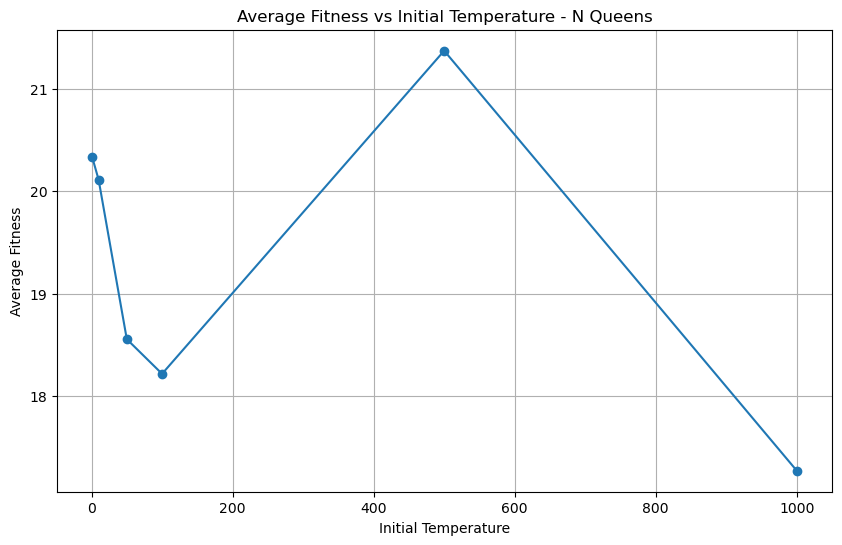

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

# Define the N Queens problem
fitness_fn_nqueens = mlrose_hiive.Queens()
problem_nqueens = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness_fn_nqueens, maximize=True, max_val=8)

# Define common parameters
random_seeds = [8, 16, 32, 64, 128]
init_temps = [1, 10, 50, 100, 500, 1000]  # Different initial temperatures to test

# Function to create SA runner
def create_sa_runner(problem, rand_seed, init_temp):
    experiment_name = f'{problem.fitness_fn.__class__.__name__}_SA_Seed{rand_seed}_Temp{init_temp}'
    return mlrose_hiive.SARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        temperature_list=[mlrose_hiive.ExpDecay(init_temp=init_temp, exp_const=0.1, min_temp=1.0)]
    )

# Initialize an empty DataFrame for storing the results
results_df_nqueens = pd.DataFrame(columns=['Initial_Temperature', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals'])

# Execute the SA optimization algorithm for each initial temperature and seed
for init_temp in init_temps:
    for rand_seed in random_seeds:
        sa_runner = create_sa_runner(problem_nqueens, rand_seed, init_temp)
        sa_results = sa_runner.run()

        # Extract the fitness curve data
        fitness_data = sa_results[1]

        # Create a DataFrame for the current initial temperature and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add initial temperature and seed information to the DataFrame
        temp_df['Initial_Temperature'] = init_temp
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Initial_Temperature', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df_nqueens = pd.concat([results_df_nqueens, temp_df], ignore_index=True)

# Calculate the average fitness for each initial temperature
avg_fitness_nqueens = results_df_nqueens.groupby('Initial_Temperature')['Fitness'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Initial Temperature')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Initial Temperature - N Queens')
plt.plot(avg_fitness_nqueens['Initial_Temperature'], avg_fitness_nqueens['Fitness'], marker='o')
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_ga_runner(problem, prob_size, rand_seed, mutation_rate):
    experiment_name = f'NQueens_GA_Size{prob_size}_Seed{rand_seed}_Mutation{mutation_rate}'
    return mlrose_hiive.GARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        population_sizes=[400],  # Fixed population size
        mutation_rates=[mutation_rate],
        crossover_rates=[0.5],  # Fixed crossover rate
        max_attempts=500
    )

problem_size = 12  # Standard N-Queens problem size
random_seeds = [8, 16, 32, 64, 128]
mutation_rates = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different mutation rates to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Mutation_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for N-Queens
fitness_fn_NQueens = mlrose_hiive.Queens()

# Execute the GA optimization algorithm for each mutation rate and seed
for mutation_rate in mutation_rates:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_NQueens, maximize=True, max_val=problem_size)

        ga_runner = create_ga_runner(optimization_problem, problem_size, rand_seed, mutation_rate)
        ga_results = ga_runner.run()

        # Extract the fitness curve data
        fitness_data = ga_results[1]

        # Create a DataFrame for the current mutation rate and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add mutation rate and seed information to the DataFrame
        temp_df['Mutation_Rate'] = mutation_rate
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Mutation_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each mutation rate
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Mutation_Rate']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Mutation_Rate': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Mutation Rate')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Mutation Rate - N-Queens (Problem Size 8)')
plt.plot(avg_fitness_df['Mutation_Rate'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running GA with mutation rate 0.1 and seed 8...


TypeError: cannot unpack non-iterable NoneType object

Running GA with population size 50 and seed 8...
Running GA with population size 50 and seed 16...
Running GA with population size 50 and seed 32...
Running GA with population size 50 and seed 64...
Running GA with population size 50 and seed 128...
Running GA with population size 100 and seed 8...
Running GA with population size 100 and seed 16...
Running GA with population size 100 and seed 32...
Running GA with population size 100 and seed 64...
Running GA with population size 100 and seed 128...
Running GA with population size 200 and seed 8...
Running GA with population size 200 and seed 16...
Running GA with population size 200 and seed 32...
Running GA with population size 200 and seed 64...
Running GA with population size 200 and seed 128...
Running GA with population size 400 and seed 8...
Running GA with population size 400 and seed 16...
Running GA with population size 400 and seed 32...
Running GA with population size 400 and seed 64...
Running GA with population size 400 a

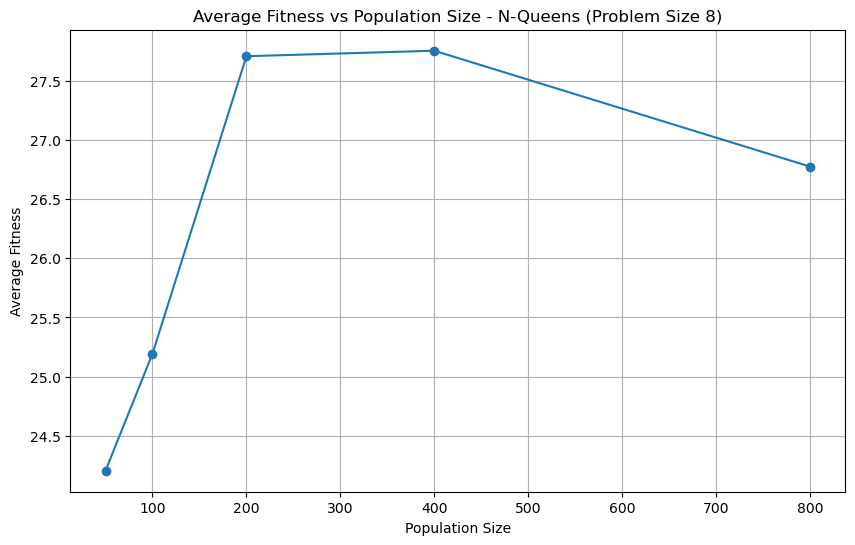

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_ga_runner(problem, prob_size, rand_seed, population_size):
    experiment_name = f'NQueens_GA_Size{prob_size}_Seed{rand_seed}_Population{population_size}'
    return mlrose_hiive.GARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        population_sizes=[population_size],
        mutation_rates=[0.5],  # Optimal mutation rate
        crossover_rates=[0.5],  # Fixed crossover rate
        max_attempts=500
    )

problem_size = 8  # Standard N-Queens problem size
random_seeds = [8, 16, 32, 64, 128]
population_sizes = [50, 100, 200, 400, 800]  # Different population sizes to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Population_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for N-Queens
fitness_fn_NQueens = mlrose_hiive.Queens()

# Execute the GA optimization algorithm for each population size and seed
for population_size in population_sizes:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_NQueens, maximize=True, max_val=problem_size)

    
        ga_runner = create_ga_runner(optimization_problem, problem_size, rand_seed, population_size)
        ga_results = ga_runner.run()

        # Extract the fitness curve data
        fitness_data = ga_results[1]

        # Create a DataFrame for the current population size and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add population size and seed information to the DataFrame
        temp_df['Population_Size'] = population_size
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Population_Size', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each population size
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Population_Size']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Population_Size': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Population Size')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Population Size - N-Queens (Problem Size 8)')
plt.plot(avg_fitness_df['Population_Size'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running GA with crossover rate 0.1 and seed 8...
Running GA with crossover rate 0.1 and seed 16...
Running GA with crossover rate 0.1 and seed 32...
Running GA with crossover rate 0.1 and seed 64...
Running GA with crossover rate 0.1 and seed 128...
Running GA with crossover rate 0.3 and seed 8...
Running GA with crossover rate 0.3 and seed 16...
Running GA with crossover rate 0.3 and seed 32...
Running GA with crossover rate 0.3 and seed 64...
Running GA with crossover rate 0.3 and seed 128...
Running GA with crossover rate 0.5 and seed 8...
Running GA with crossover rate 0.5 and seed 16...
Running GA with crossover rate 0.5 and seed 32...
Running GA with crossover rate 0.5 and seed 64...
Running GA with crossover rate 0.5 and seed 128...
Running GA with crossover rate 0.7 and seed 8...
Running GA with crossover rate 0.7 and seed 16...
Running GA with crossover rate 0.7 and seed 32...
Running GA with crossover rate 0.7 and seed 64...
Running GA with crossover rate 0.7 and seed 128...


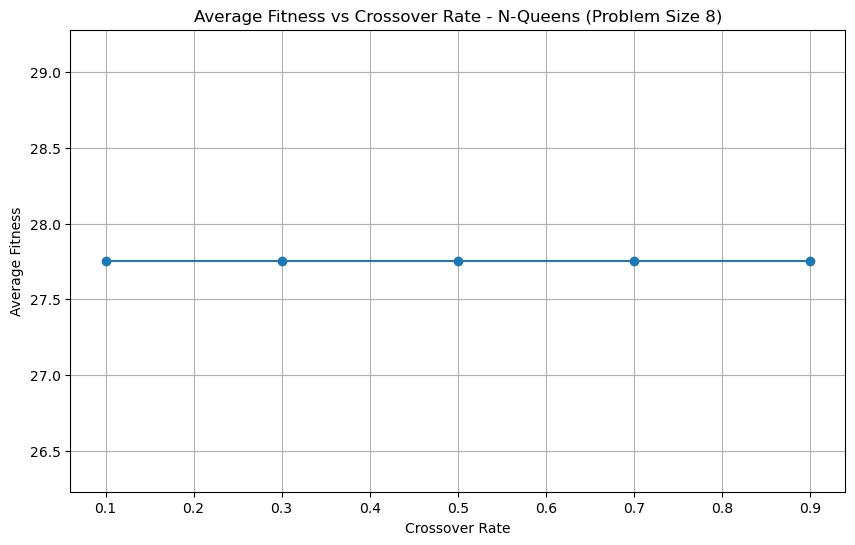

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_ga_runner(problem, prob_size, rand_seed, crossover_rate):
    experiment_name = f'NQueens_GA_Size{prob_size}_Seed{rand_seed}_Crossover{crossover_rate}'
    return mlrose_hiive.GARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        population_sizes=[400],  # Optimal population size
        mutation_rates=[0.5],  # Optimal mutation rate
        crossover_rates=[crossover_rate],
        max_attempts=500
    )

problem_size = 8  # Standard N-Queens problem size
random_seeds = [8, 16, 32, 64, 128]
crossover_rates = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different crossover rates to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Crossover_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for N-Queens
fitness_fn_NQueens = mlrose_hiive.Queens()

# Execute the GA optimization algorithm for each crossover rate and seed
for crossover_rate in crossover_rates:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_NQueens, maximize=True, max_val=problem_size)

    
        ga_runner = create_ga_runner(optimization_problem, problem_size, rand_seed, crossover_rate)
        ga_results = ga_runner.run()

        # Extract the fitness curve data
        fitness_data = ga_results[1]

        # Create a DataFrame for the current crossover rate and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add crossover rate and seed information to the DataFrame
        temp_df['Crossover_Rate'] = crossover_rate
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Crossover_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each crossover rate
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Crossover_Rate']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Crossover_Rate': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Crossover Rate')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Crossover Rate - N-Queens (Problem Size 8)')
plt.plot(avg_fitness_df['Crossover_Rate'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()


Running SA with initial temperature 10, decay rate 0.001, and seed 8...
Running SA with initial temperature 10, decay rate 0.001, and seed 16...
Running SA with initial temperature 10, decay rate 0.001, and seed 32...
Running SA with initial temperature 10, decay rate 0.001, and seed 64...
Running SA with initial temperature 10, decay rate 0.001, and seed 128...
Running SA with initial temperature 50, decay rate 0.001, and seed 8...
Running SA with initial temperature 50, decay rate 0.001, and seed 16...
Running SA with initial temperature 50, decay rate 0.001, and seed 32...
Running SA with initial temperature 50, decay rate 0.001, and seed 64...
Running SA with initial temperature 50, decay rate 0.001, and seed 128...
Running SA with initial temperature 100, decay rate 0.001, and seed 8...
Running SA with initial temperature 100, decay rate 0.001, and seed 16...
Running SA with initial temperature 100, decay rate 0.001, and seed 32...
Running SA with initial temperature 100, decay ra

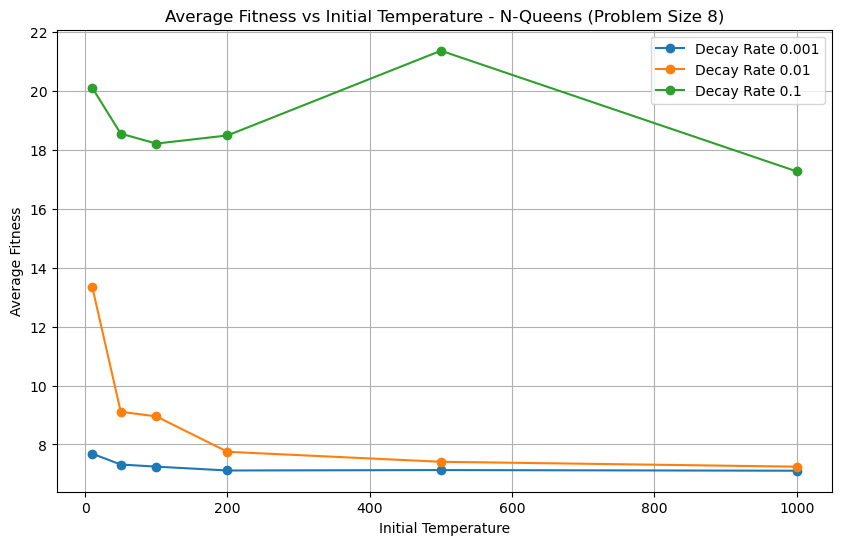

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_sa_runner(problem, rand_seed, init_temp, decay_rate):
    experiment_name = f'NQueens_SA_Seed{rand_seed}_Temp{init_temp}_Decay{decay_rate}'
    return mlrose_hiive.SARunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        temperature_list=[mlrose_hiive.ExpDecay(init_temp=init_temp, exp_const=decay_rate, min_temp=1.0)],
        max_attempts=500
    )

problem_size = 8  # Standard N-Queens problem size
random_seeds = [8, 16, 32, 64, 128]
initial_temperatures = [10, 50, 100, 200, 500, 1000]  # Different initial temperatures to test
decay_rates = [0.001, 0.01, 0.1]  # Different decay rates to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Initial_Temperature', 'Decay_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for N-Queens
fitness_fn_NQueens = mlrose_hiive.Queens()
problem_nqueens = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_NQueens, maximize=True, max_val=problem_size)

# Execute the SA optimization algorithm for each initial temperature, decay rate, and seed
for decay_rate in decay_rates:
    for init_temp in initial_temperatures:
        for rand_seed in random_seeds:
        
            sa_runner = create_sa_runner(problem_nqueens, rand_seed, init_temp, decay_rate)
            sa_results = sa_runner.run()

            # Extract the fitness curve data
            fitness_data = sa_results[1]

            # Create a DataFrame for the current initial temperature, decay rate, and seed
            temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

            # Add initial temperature, decay rate, and seed information to the DataFrame
            temp_df['Initial_Temperature'] = init_temp
            temp_df['Decay_Rate'] = decay_rate
            temp_df['Seed'] = rand_seed

            # Rearrange columns to match the new order
            temp_df = temp_df[['Initial_Temperature', 'Decay_Rate', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

            # Append the data to the main results DataFrame
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each initial temperature and decay rate
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = (row['Initial_Temperature'], row['Decay_Rate'])
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    init_temp, decay_rate = key
    avg_fitness_list.append({'Initial_Temperature': init_temp, 'Decay_Rate': decay_rate, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Initial Temperature')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Initial Temperature - N-Queens (Problem Size 8)')

for decay_rate in avg_fitness_df['Decay_Rate'].unique():
    subset_df = avg_fitness_df[avg_fitness_df['Decay_Rate'] == decay_rate]
    plt.plot(subset_df['Initial_Temperature'], subset_df['Fitness'], marker='o', label=f'Decay Rate {decay_rate}')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlrose_hiive

def create_rhc_runner(problem, prob_size, rand_seed, restarts):
    experiment_name = f'NQueens_RHC_Size{prob_size}_Seed{rand_seed}_Restarts{restarts}'
    return mlrose_hiive.RHCRunner(
        problem=problem,
        experiment_name=experiment_name,
        seed=rand_seed,
        iteration_list=2**np.arange(10),
        restart_list=[restarts],
        max_attempts=500
    )

problem_size = 8  # Standard N-Queens problem size
random_seeds = [8, 16, 32, 64, 128]
restarts_list = [0, 5, 10, 20, 30]  # Different number of restarts to test

# Initialize an empty DataFrame for storing the results
result_columns = ['Restarts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']
results_df = pd.DataFrame(columns=result_columns)

# Define the fitness function for N-Queens
fitness_fn_NQueens = mlrose_hiive.Queens()

# Execute the RHC optimization algorithm for each number of restarts and seed
for restarts in restarts_list:
    for rand_seed in random_seeds:
        # Create the optimization problem instance
        optimization_problem = mlrose_hiive.DiscreteOpt(length=problem_size, fitness_fn=fitness_fn_NQueens, maximize=True, max_val=problem_size)

        rhc_runner = create_rhc_runner(optimization_problem, problem_size, rand_seed, restarts)
        rhc_results = rhc_runner.run()

        # Extract the fitness curve data
        fitness_data = rhc_results[1]

        # Create a DataFrame for the current number of restarts and seed
        temp_df = pd.DataFrame(fitness_data, columns=['Iteration', 'Fitness', 'Time', 'FEvals'])

        # Add restarts and seed information to the DataFrame
        temp_df['Restarts'] = restarts
        temp_df['Seed'] = rand_seed

        # Rearrange columns to match the new order
        temp_df = temp_df[['Restarts', 'Seed', 'Iteration', 'Fitness', 'Time', 'FEvals']]

        # Append the data to the main results DataFrame
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Calculate the average fitness for each number of restarts
avg_fitness_dict = {}
count_dict = {}

for index, row in results_df.iterrows():
    key = row['Restarts']
    
    if key not in avg_fitness_dict:
        avg_fitness_dict[key] = 0
        count_dict[key] = 0
    
    avg_fitness_dict[key] += row['Fitness']
    count_dict[key] += 1

avg_fitness_list = []

for key in avg_fitness_dict.keys():
    avg_fitness_list.append({'Restarts': key, 'Fitness': avg_fitness_dict[key] / count_dict[key]})

avg_fitness_df = pd.DataFrame(avg_fitness_list)

# Debug print to check the structure of the DataFrame
print("avg_fitness_df:")
print(avg_fitness_df.head())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Restarts')
plt.ylabel('Average Fitness')
plt.title('Average Fitness vs Number of Restarts - N-Queens (Problem Size 8)')
plt.plot(avg_fitness_df['Restarts'], avg_fitness_df['Fitness'], marker='o')
plt.grid(True)
plt.show()
